In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\bikki\AppData\Local\Temp\ipykernel_14156\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris=iris.drop(["sepal_length","sepal_width","species"],axis=1)
iris

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


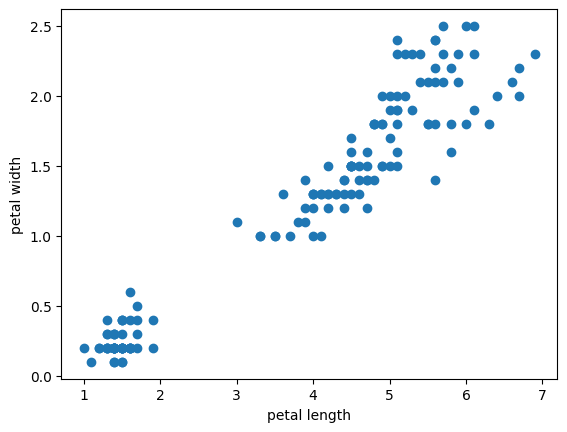

In [4]:
plt.scatter(iris["petal_length"],iris["petal_width"])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [5]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(iris)

KMeans(n_clusters=3)

In [6]:
y_pred=km.predict(iris)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris["clusters"]=y_pred
iris

,petal_length,petal_width,clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [8]:
km.cluster_centers_

array([[4.29259259, 1.35925926],
       [1.462     , 0.246     ],
       [5.62608696, 2.04782609]])

In [9]:
irisa=iris[iris.clusters==0]
irisb=iris[iris.clusters==1]
irisc=iris[iris.clusters==2]

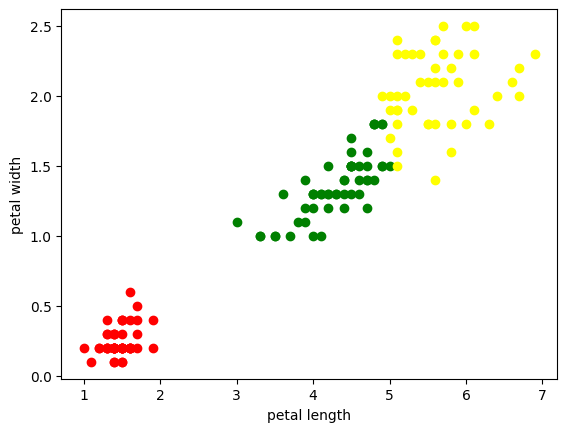

In [10]:
plt.scatter(irisa["petal_length"],irisa["petal_width"],color="green")
plt.scatter(irisb["petal_length"],irisb["petal_width"],color="red")
plt.scatter(irisc["petal_length"],irisc["petal_width"],color="yellow")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [11]:
sse=[]
k_rng=range(1,10)

for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(iris[["petal_length","petal_width"]])
    sse.append(km.inertia_)
    sse
    

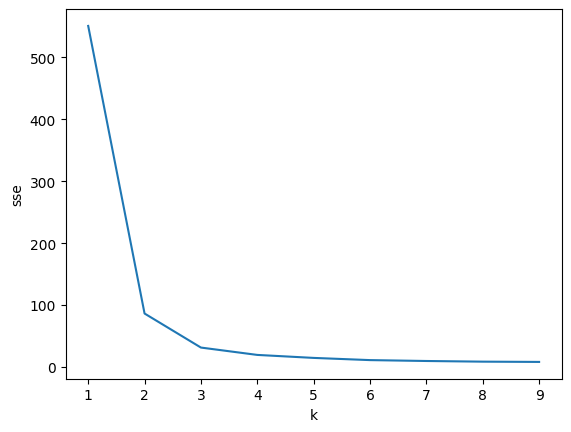

In [12]:
plt.xlabel("k")
plt.ylabel("sse")
plt.plot(k_rng,sse)
plt.show()